In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from keras.layers import Dense, LSTM, Flatten

print(tf.__version__)

2.3.0


In [219]:
# Semilla de aleatoriedad del experimento.
tf.random.set_seed(7)

In [220]:
# Carga del dataset.
dataframe = pd.read_csv('poblacion_16_65.csv', sep=";", usecols=[1], engine='python')
dataset = dataframe.values
values = dataset.astype('float32')

In [222]:
PASOS=6

# ajuste de la serie para formato de LSTM

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [223]:
# formato LSTM
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,21017614.0,21108668.0,21202298.0,21300704.0,21403962.0,21513652.0,21629402.0
7,21108668.0,21202298.0,21300704.0,21403962.0,21513652.0,21629402.0,21743452.0
8,21202298.0,21300704.0,21403962.0,21513652.0,21629402.0,21743452.0,21858044.0
9,21300704.0,21403962.0,21513652.0,21629402.0,21743452.0,21858044.0,21973084.0
10,21403962.0,21513652.0,21629402.0,21743452.0,21858044.0,21973084.0,22089562.0


In [224]:
# separación en datos de test y entrenamiento del modelo
values = reframed.values
n_train_days = 103 - (7+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# separación en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reformulación 3D vectores para LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(90, 1, 6) (90,) (7, 1, 6) (7,)


In [225]:
# Definición del modelo

def crear_modeloFF():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, PASOS)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [226]:
# Definición del número de epochs de entrenamiento del modelo.

EPOCHS=200
 
model = crear_modeloFF()

#Entrenamiento del modelo

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50)                11400     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 0s 25ms/step - loss: 825566399823872.0000 - val_loss: 944069446467584.0000
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 643573670215680.0000 - val_loss: 722696363048960.0000
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 483265525841920.0000 - val_loss: 526790355320832.0000
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 344336789143552.0000 - val_loss: 365791425855488.0000
Ep

15/15 [==============================] - 0s 2ms/step - loss: 134139723776.0000 - val_loss: 34756632576.0000
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 133361975296.0000 - val_loss: 30540609536.0000
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 132788543488.0000 - val_loss: 25872820224.0000
Epoch 66/200
15/15 [==============================] - 0s 2ms/step - loss: 134415081472.0000 - val_loss: 41480491008.0000
Epoch 67/200
15/15 [==============================] - 0s 2ms/step - loss: 132113514496.0000 - val_loss: 28636059648.0000
Epoch 68/200
15/15 [==============================] - 0s 2ms/step - loss: 132053000192.0000 - val_loss: 29386932224.0000
Epoch 69/200
15/15 [==============================] - 0s 2ms/step - loss: 132980989952.0000 - val_loss: 26234603520.0000
Epoch 70/200
15/15 [==============================] - 0s 2ms/step - loss: 131933659136.0000 - val_loss: 32458762240.0000
Epoch 71/200
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 131730595840.0000 - val_loss: 27905366016.0000
Epoch 131/200
15/15 [==============================] - 0s 2ms/step - loss: 131718004736.0000 - val_loss: 29837496320.0000
Epoch 132/200
15/15 [==============================] - 0s 2ms/step - loss: 136158257152.0000 - val_loss: 32529852416.0000
Epoch 133/200
15/15 [==============================] - 0s 2ms/step - loss: 132320641024.0000 - val_loss: 24301381632.0000
Epoch 134/200
15/15 [==============================] - 0s 2ms/step - loss: 133990359040.0000 - val_loss: 40008577024.0000
Epoch 135/200
15/15 [==============================] - 0s 2ms/step - loss: 131787849728.0000 - val_loss: 29897060352.0000
Epoch 136/200
15/15 [==============================] - 0s 2ms/step - loss: 131687743488.0000 - val_loss: 25528547328.0000
Epoch 137/200
15/15 [==============================] - 0s 2ms/step - loss: 139277811712.0000 - val_loss: 21887578112.0000
Epoch 138/200
15/15 [=================

15/15 [==============================] - 0s 2ms/step - loss: 131261759488.0000 - val_loss: 29915713536.0000
Epoch 198/200
15/15 [==============================] - 0s 2ms/step - loss: 132825104384.0000 - val_loss: 32441010176.0000
Epoch 199/200
15/15 [==============================] - 0s 2ms/step - loss: 129988149248.0000 - val_loss: 18794039296.0000
Epoch 200/200
15/15 [==============================] - 0s 2ms/step - loss: 131995664384.0000 - val_loss: 41449140224.0000


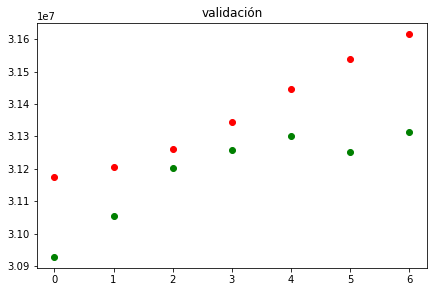

In [227]:
# Comparación de los resultados predichos por el modelo con los resultados reales de la serie.
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación')
plt.show()

In [228]:
# Carga de nuevo del dataset.
dataframe_2 = pd.read_csv('poblacion_16_65.csv', sep=";", usecols=[1], engine='python')
dataframe_2 = dataframe_2.values
values_2 = dataframe_2.astype('float32')

In [229]:
# Recogida de los ultimos valores.
values_2 = values_2[-70:]


In [230]:
PASOS = 6

reframed_2 = series_to_supervised(values_2, PASOS, 1)
reframed_2.drop(reframed_2.columns[[6]], axis=1, inplace=True) # Quita las columnas que queremos predecir (t).
reframed_2.head(7)

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
6,25008644.0,25109374.0,25202372.0,25296020.0,25387158.0,25479364.0
7,25109374.0,25202372.0,25296020.0,25387158.0,25479364.0,25571032.0
8,25202372.0,25296020.0,25387158.0,25479364.0,25571032.0,25663566.0
9,25296020.0,25387158.0,25479364.0,25571032.0,25663566.0,25797004.0
10,25387158.0,25479364.0,25571032.0,25663566.0,25797004.0,25953700.0
11,25479364.0,25571032.0,25663566.0,25797004.0,25953700.0,26102666.0
12,25571032.0,25663566.0,25797004.0,25953700.0,26102666.0,26255888.0


In [231]:
values = reframed_2.values
x_test = values[63:, :] #Coge la ultima columna que es equivalente a la ultima fila.
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[30928650., 31053952., 31202808., 31256540., 31299828.,
         31250224.]]], dtype=float32)

In [232]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(77):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[30928650. 31053952. 31202808. 31256540. 31299828. 31250224.]]]
[[[31053952. 31202808. 31256540. 31299828. 31250224. 31614934.]]]
[[[31202808. 31256540. 31299828. 31250224. 31614934. 31699418.]]]
[[[31256540. 31299828. 31250224. 31614934. 31699418. 31815864.]]]
[[[31299828. 31250224. 31614934. 31699418. 31815864. 31953506.]]]
[[[31250224. 31614934. 31699418. 31815864. 31953506. 32046520.]]]
[[[31614934. 31699418. 31815864. 31953506. 32046520. 32179596.]]]
[[[31699418. 31815864. 31953506. 32046520. 32179596. 32335652.]]]
[[[31815864. 31953506. 32046520. 32179596. 32335652. 32451502.]]]
[[[31953506. 32046520. 32179596. 32335652. 32451502. 32584542.]]]
[[[32046520. 32179596. 32335652. 32451502. 32584542. 32715412.]]]
[[[32179596. 32335652. 32451502. 32584542. 32715412. 32840990.]]]
[[[32335652. 32451502. 32584542. 32715412. 32840990. 32977194.]]]
[[[32451502. 32584542. 32715412. 32840990. 32977194. 33111020.]]]
[[[32584542. 32715412. 32840990. 32977194. 33111020. 33241694.]]]
[[[3271541

In [234]:
index = pd.Index(range(103, 180, 1))


prediccion1 = pd.DataFrame(results, index)
prediccion1.columns = ['total']
prediccion1

,total
103,31614934.0
104,31699418.0
105,31815864.0
106,31953506.0
107,32046520.0
...,...
175,42108528.0
176,42277608.0
177,42447360.0
178,42617796.0


In [235]:
dataframe_3 = pd.read_csv('poblacion_16_65.csv', sep=";", usecols=[1], engine='python')
dataframe_3 = dataframe_3.values
values_3 = dataframe_3.astype('float32')
antiguo = pd.DataFrame(values_3)
antiguo.columns = ['total']


In [236]:
frames = [antiguo, prediccion1]

result = pd.concat(frames)


In [237]:
result

result.to_csv('prueba1.csv', mode='a', index=False, header=False)


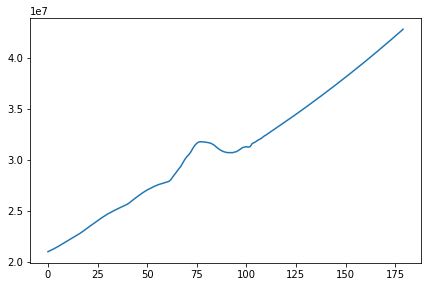

In [238]:
# Se representa conjuntamente los datos obtenidos tras la predicción junto con los datos reales de la serie.
plt.plot(result)
plt.show()